#**OPORTUNIDAD DE COMPRA DE CASAS**
##***Modelo de Regresion Logistica***
                                                          
                                                        JAVIER RAMIREZ CERVANTES

#Objetivo: #

*Proponer un modelo de aprendizaje supervisado (regresión lineal, ridge o lasso) o un modelo de aprendizaje no supervisado (clúster). El objetivo del modelo es determinar oprtunidades de compra de casas.*

***Una oportunidad de compra se define como aquella situación en la cual una casa tiene un precio que puede ser menor al promedio de casas similares o con características similares.***

In [ ]:
# IMPORTAR PAQUETERIAS
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#
import warnings
warnings.filterwarnings('ignore') # Para ignorar warnings

In [ ]:
# Opciones de visualizació de cifras:
pd.options.display.float_format = '{:,.2f}'.format #'${:,.2f}'


Descarga de datos

 La información corresponde a precios de casas en algunos counties de Florida, especificamente los cercanos a Miami tomadas de la web de Zillow a mediados de septiembre de 2024:

FUENTE: https://docs.google.com/spreadsheets/d/1jYSci0X46TmDTAVCozflLTFYZkuzGqJT/edit?usp=sharing&rtpof=true&sd=true

In [ ]:
# Conectarse con Google Drive para exportar el archivo
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se exporta el archivo de trabajo  como un dataframe y se muestran los ultimos 5 registros
price_house24 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FLORIDArevisionfeatures.xlsx', engine='openpyxl')
price_house24.tail(5)

,listingDataSource,zpid,city,state,homeStatus,isListingClaimedByCurrentSignedInUser,isCurrentSignedInAgentResponsible,bedrooms,bathrooms,price,yearBuilt,streetAddress,zipcode,isCurrentSignedInUserVerifiedOwner,regionString,propertyUpdatePageLink,moveHomeMapLocationLink,propertyEventLogLink,editPropertyHistorylink,isRentalListingOffMarket,hdpUrl,nearbyCities,nearbyNeighborhoods,country,nearbyZipcodes,abbreviatedAddress,building,isUndisclosedAddress,boroughId,providerListingID,boroughSearchUrl,communityUrl,isPremierBuilder,isZillowOwned,homeType,currency,listPriceLow,livingArea,livingAreaValue,zestimate,newConstructionType,zestimateLowPercent,zestimateHighPercent,rentZestimate,restimateLowPercent,restimateHighPercent,schools,homeValues,nearbyHomes,countyFIPS,...,distancenerabSchool,namenerabSchool,ratingnerabSchool,levelnerabSchool,gradesnerabSchool,linknearbySchool,SCHOOLSMeandistance,MeanratingnerabSchool,TIMEpaidTaxHist,IDTAXTaxHist,IncrRATETaxHist,VALUETaxHist,VALINCRATETaxHist,MeanpricesnerabyHomes_y,MeanbedroomsnerabyHomes_y,MeanbathroomsnerabyHomes_y,MeanlivingAreanerabyHomes_y,MeanlotSizenerabyHomes_y,MeanlotAreaValuenerabyHomes_y,MeantaxPaidtaxHistory,MeanIncrRATETaxHist,MeanVALUETaxHist,MeanVALINCRATETaxHist,latitude_InfoTOD,longitude_InfoTOD,homeStatus_InfoTOD,daysOnZillow_InfoTOD,isPreforeclosureAuction_InfoTOD,isZillowOwned_InfoTOD,taxAssessedValue_InfoTOD,datePriceChanged_InfoTOD,priceReduction_InfoTOD,priceChange_y,detailUrl_InfoTOD,price_to_rent_ratio_InfoTOD,County,contactFormRenderData.data.region_phone_number,contactFormRenderData.data.subtitle,adTargets,contactFormRenderData.data.footers,image_urls,source_file,ADULTCOM,ADULTCOMFound_In_Columns,ANNUALDUES,ANNUALDUESFound_In_Columns,WAITINGPERIOD,WAITINGPERIODFound_In_Columns,BUYINFEE,BUYINFEEFound_In_Columns
28058,Phoenix,43728143,naples,FL,for_sale,False,False,6.00,9.00,21950000,"2,024.00",1583 Gordon Dr,"34,102.00",False,Naples FL 34102,NaN,NaN,NaN,NaN,0.00,/homedetails/1583-Gordon-Dr-Naples-FL-34102/43...,"[{'regionUrl': {'path': '/ave-maria-fl/'}, 'na...",[{'regionUrl': {'path': '/golden-gate-naples-f...,USA,"[{'regionUrl': {'path': '/naples-fl-34104/'}, ...",1583 Gordon Dr,NaN,False,NaN,NaN,NaN,NaN,False,False,single_family,USD,NaN,"7,377.00","7,377.00",NaN,BUILDER_SPEC,NaN,NaN,NaN,NaN,NaN,"[{'distance': 2.6, 'name': 'Lake Park Elementa...",NaN,"[{'zpid': 54155161, 'miniCardPhotos': [{'url':...","12,021.00",...,"[2.6, 1.2, 3.1]","Lake Park Elementary School, Gulfview Middle S...","[10.0, 6.0, 5.0]","Primary, Middle, Primary","PK-5, 6-8, PK,9-12",https://www.greatschools.org/florida/naples/52...,2.30,7.00,"[1694687317566.0, 1663151317566.0, 16316153175...","[56098.15, 52426.28, 33805.04, 30963.94, 28365...","[0.070038676, 0.5508422, 0.09175511, 0.0916148...","[5449143.0, 5346182.0, 3263275.0, 2966614.0, 2...","[0.019258792, 0.6382873, 0.09999987, 0.0999999...","8,899,400.00",4.17,5.25,"4,167.00","15,572.12","2,504.80","23,225.26",0.10,"2,111,385.65",0.10,26.13,-81.80,FOR_SALE,-1,False,False,"6,771,000.00",NaN,NaN,NaN,https://www.zillow.com/homedetails/1583-Gordon...,NaN,Monroe,NaN,NaN,NaN,NaN,"[""https://www.greatschools.org/florida/naples/...",MONROE_detailsVENTA120924_TODO_processed.xlsx,0,NaN,0,NaN,0,NaN,0,NaN
28059,Phoenix,54159379,naples,FL,for_sale,False,False,6.00,9.00,20750000,"2,024.00",3277 Gordon Dr,"34,102.00",False,Naples FL 34102,NaN,NaN,NaN,NaN,0.00,/homedetails/3277-Gordon-Dr-Naples-FL-34102/54...,"[{'regionUrl': {'path': '/ave-maria-fl/'}, 'na...",[{'regionUrl': {'path': '/golden-gate-naples-f...,USA,"[{'regionUrl': {'path': '/naples-fl-34104/'}, ...",3277 Gordon Dr,NaN,False,NaN,NaN,NaN,NaN,False,False,single_family,USD,NaN,"6,444.00","6,444.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'distance': 3.9, 'name': 'Lake Park Elementa...",NaN,"[{'zpid': 337883100, 'miniCardPhotos': [{'url'...","12,021.00",...,"[3.9, 2.5, 4.4]","Lake Park Elementary School, Gulfview Middle S...","[10.0, 6.0, 5.0]","Primary, Middle, Primary","PK-5, 6-8, PK,9-12",https://w

In [ ]:
#se muestra la informacion del dataframe
price_house24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28063 entries, 0 to 28062
Columns: 805 entries, listingDataSource to BUYINFEEFound_In_Columns
dtypes: bool(109), float64(296), int64(10), object(390)
memory usage: 151.9+ MB


In [ ]:
# descripcion del Dataframe
price_house24.describe()

,zpid,bedrooms,bathrooms,price,yearBuilt,zipcode,propertyUpdatePageLink,moveHomeMapLocationLink,propertyEventLogLink,editPropertyHistorylink,isRentalListingOffMarket,building,boroughId,boroughSearchUrl,communityUrl,listPriceLow,livingArea,livingAreaValue,zestimate,zestimateLowPercent,zestimateHighPercent,rentZestimate,restimateLowPercent,restimateHighPercent,homeValues,countyFIPS,pageViewCount,favoriteCount,daysOnZillow,latitude,longitude,listingProvider,isIncomeRestricted,brokerId,ssid,monthlyHoaFee,propertyTaxRate,buildingId,photoCount,lotSize,lotAreaValue,richMedia,cityId,stateId,zipPlusFour,numberOfUnitsTotal,foreclosureDefaultFilingDate,foreclosureLoanDate,foreclosureLoanAmount,foreclosurePriorSaleDate,...,Price change_priceHist_x,Price change_pricePerSquareFootPHist_x,Price change_priceChangeRatePHist_x,Price change_priceHist_y,Price change_pricePerSquareFootPHist_y,Price change_priceChangeRatePHist_y,Pending sale_priceHist_x,Pending sale_pricePerSquareFootPHist_x,Pending sale_priceChangeRatePHist_x,Pending sale_priceHist_y,Pending sale_pricePerSquareFootPHist_y,Pending sale_priceChangeRatePHist_y,Contingent_priceHist_x,Contingent_pricePerSquareFootPHist_x,Contingent_priceChangeRatePHist_x,Contingent_priceHist_y,Contingent_pricePerSquareFootPHist_y,Contingent_priceChangeRatePHist_y,MeanPricesnearbyHomes,MeanBedrmsnearbyHomes,MeanBathrmsnearbyHomes,MeanLivingAreanearbyHomes,MeanlotSizenerabyHomes_x,MeanlotAreaValuenerabyHomes_x,SCHOOLSMeandistance,MeanratingnerabSchool,MeanpricesnerabyHomes_y,MeanbedroomsnerabyHomes_y,MeanbathroomsnerabyHomes_y,MeanlivingAreanerabyHomes_y,MeanlotSizenerabyHomes_y,MeanlotAreaValuenerabyHomes_y,MeantaxPaidtaxHistory,MeanIncrRATETaxHist,MeanVALUETaxHist,MeanVALINCRATETaxHist,latitude_InfoTOD,longitude_InfoTOD,daysOnZillow_InfoTOD,taxAssessedValue_InfoTOD,datePriceChanged_InfoTOD,priceChange_y,price_to_rent_ratio_InfoTOD,contactFormRenderData.data.region_phone_number,adTargets,ADULTCOM,ANNUALDUES,WAITINGPERIOD,BUYINFEE,BUYINFEEFound_In_Columns
count,"28,063.00","27,130.00","27,171.00","28,063.00","27,233.00","28,062.00",0.00,0.00,0.00,0.00,"28,061.00",0.00,0.00,0.00,0.00,2.00,"26,999.00","27,000.00","17,828.00","17,828.00","17,828.00","18,991.00","15,604.00","15,604.00",0.00,"24,718.00","28,058.00","28,058.00","28,041.00","28,063.00","28,063.00",0.00,0.00,0.00,"27,983.00","17,344.00","28,061.00","11,229.00","28,063.00","25,026.00","25,026.00",0.00,"27,717.00","28,063.00","23,943.00","4,379.00",113.00,1.00,1.00,132.00,...,"20,598.00","19,851.00","20,622.00","20,598.00","19,851.00","20,622.00","9,071.00","8,748.00","9,071.00","9,071.00","8,748.00","9,071.00","4,337.00","4,165.00","4,337.00","4,337.00","4,165.00","4,337.00","28,063.00","27,990.00","28,008.00","27,993.00","26,434.00","26,434.00","28,063.00","28,062.00","28,063.00","27,990.00","28,008.00","27,993.00","26,434.00","26,434.00","24,199.00","24,202.00","24,202.00","24,202.00","28,063.00","28,063.00","28,063.00","24,204.00","13,128.00","13,128.00","17,338.00",0.00,0.00,"28,063.00","28,063.00","28,063.00","28,063.00",0.00
mean,"233,420,192.55",3.08,2.81,"1,667,499.47","1,984.61","33,263.77",NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN,"687,500.00","2,052.91","2,052.90","1,256,134.10",5.14,5.20,"6,665.71",7.22,8.41,NaN,"12,066.68",578.09,28.37,107.83,26.14,-80.25,NaN,NaN,NaN,354.93,878.23,0.82,"1,300,320,853.49",35.42,"553,779.37","2,681.63",NaN,"30,533.66",14.00,"4,274.27",80.66,"1,712,754,605,309.73","1,623,974,400,000.00","637,500.00","1,320,248,290,909.09",...,"1,112,299.57",402.23,56.06,"1,112,299.57",402.23,56.06,"980,300.48",357.70,0.30,"980,300.48",357.70,0.30,"1,161,275.53",442.54,0.00,"1,161,275.53",442.54,0.00,"984,029.77",2.79,2.41,"1,982.00","718,739.54","3,128.12",2.09,5.27,"984,029.77",2.79,2.41,"1,982.00","718,739.54","3,128.12","6,809.56",0.76,"375,877.10",0.65,26.14,-80.25,-1.00,"895,166.46","1,721,318,160,329.07","-37,508.08",181.12,NaN,NaN,0.01,0.00,0.00,0.00,NaN
std,"524,952,687.15",1.47,1.55,"4,420,254.17",51.02,189.45,NaN,N

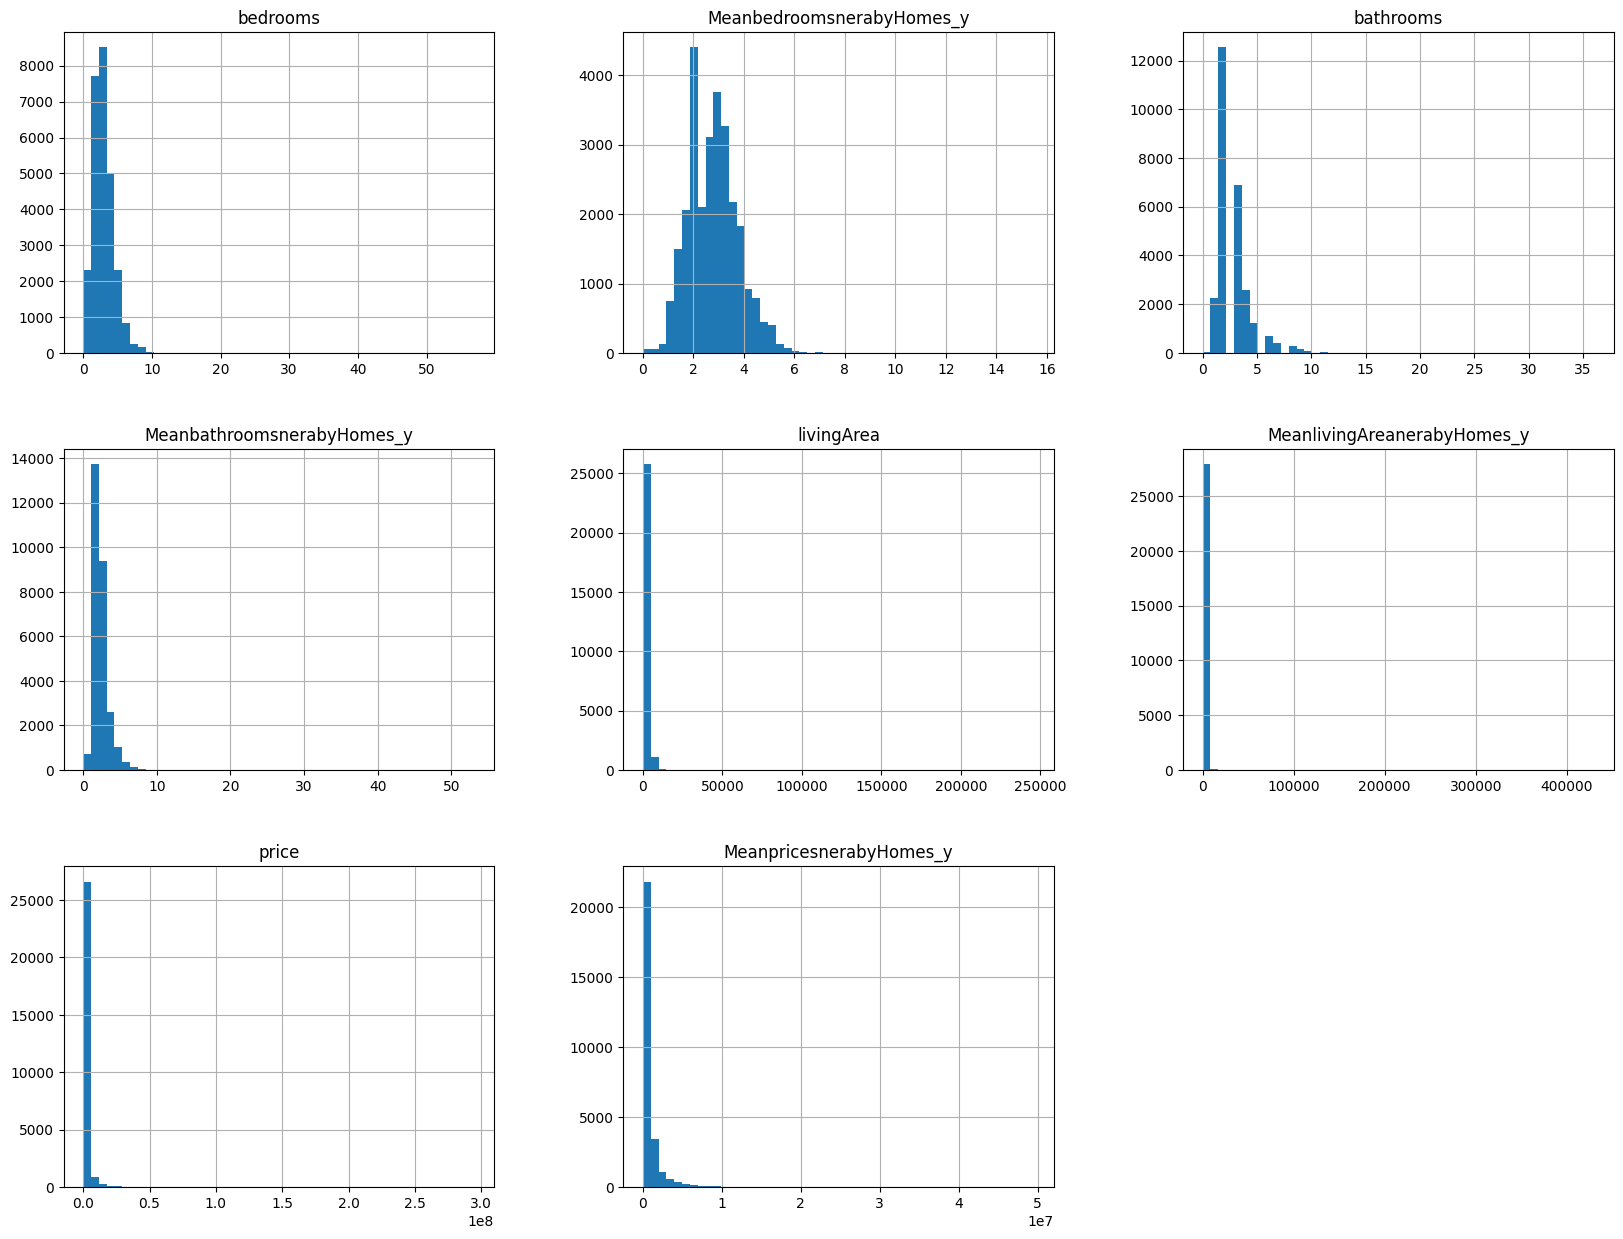

In [ ]:
# Creamos un histograma:
price_house24[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))

plt.show()

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'MeanbedroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'MeanbathroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'MeanlivingAreanerabyHomes_y'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'MeanpricesnerabyHomes_y'}>, <Axes: >]],
      dtype=object)

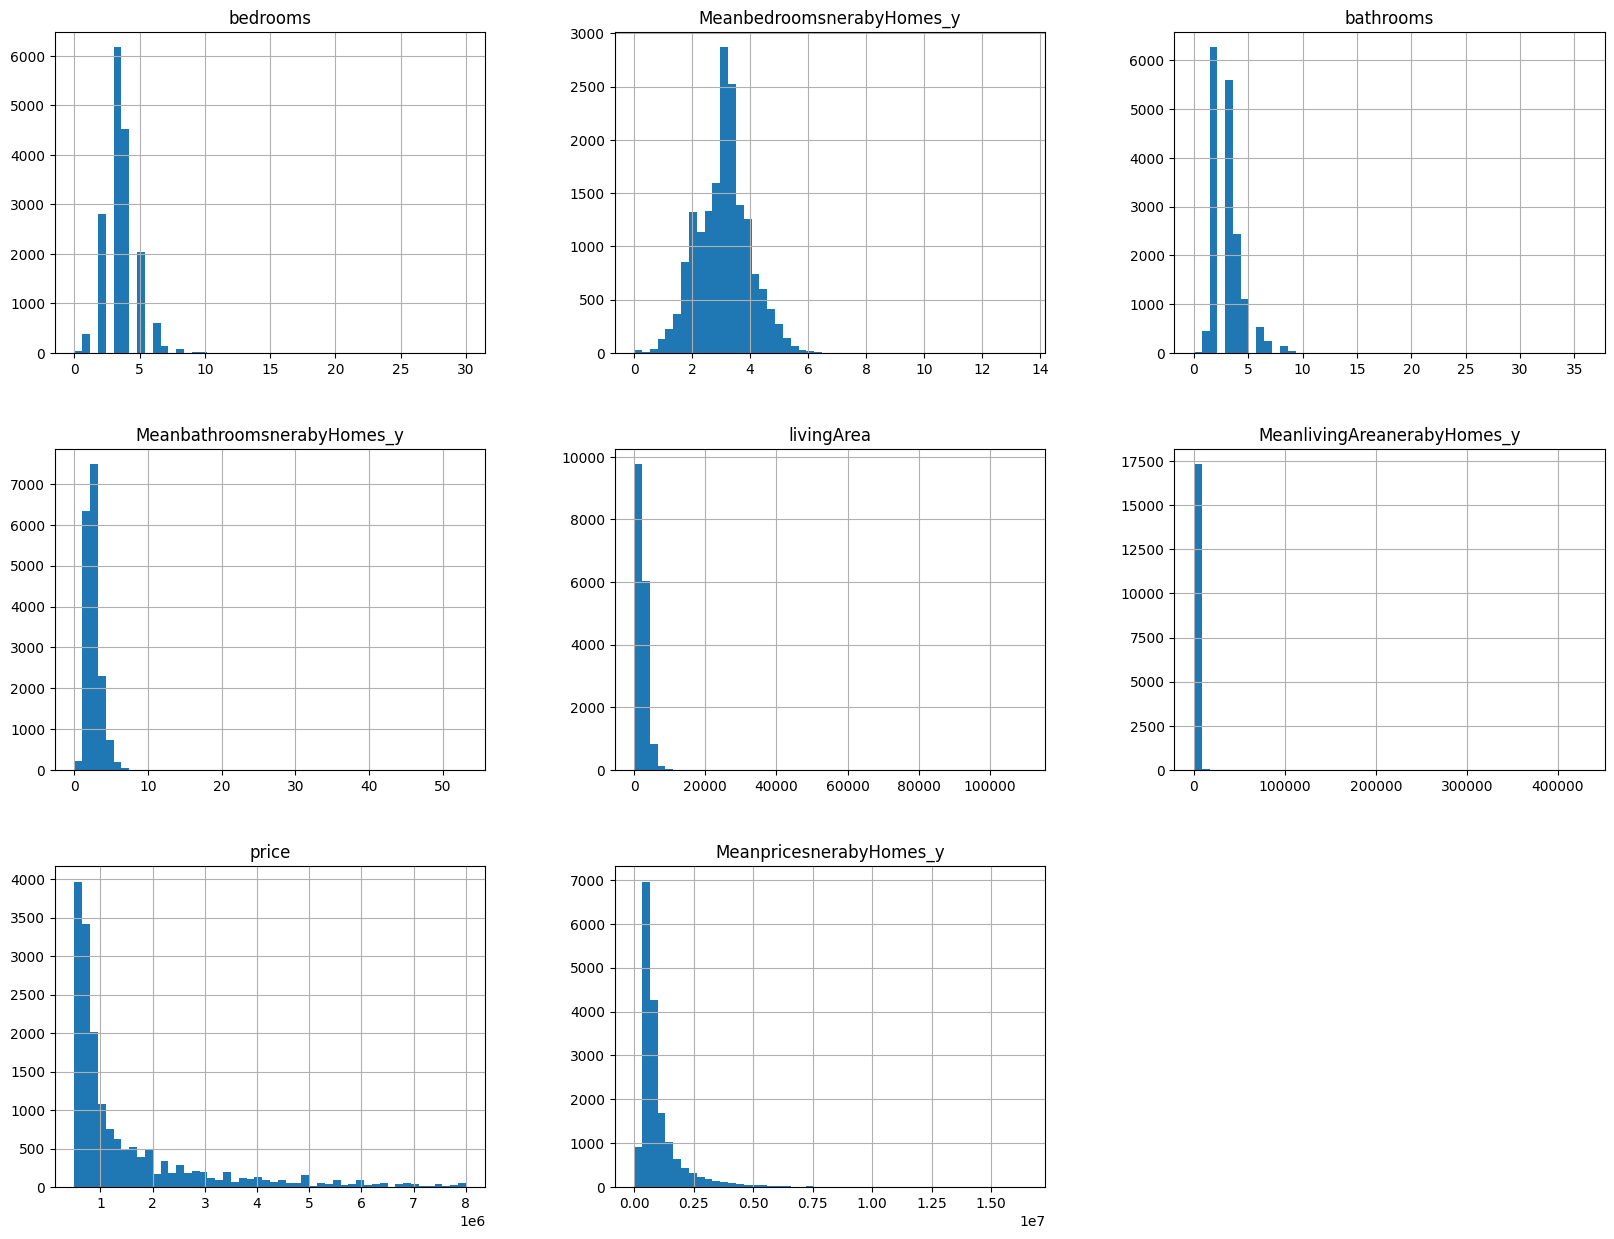

In [ ]:
# se ajusta el rango de los precios, con un valor minimo de 500,000 y un maximo de 7,999,999
price_house24_sel = price_house24[ (price_house24['price'] > 500000 ) & (price_house24['price'] < 8000000)  ]

price_house24_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'MeanbedroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'MeanbathroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'MeanlivingAreanerabyHomes_y'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'MeanpricesnerabyHomes_y'}>, <Axes: >]],
      dtype=object)

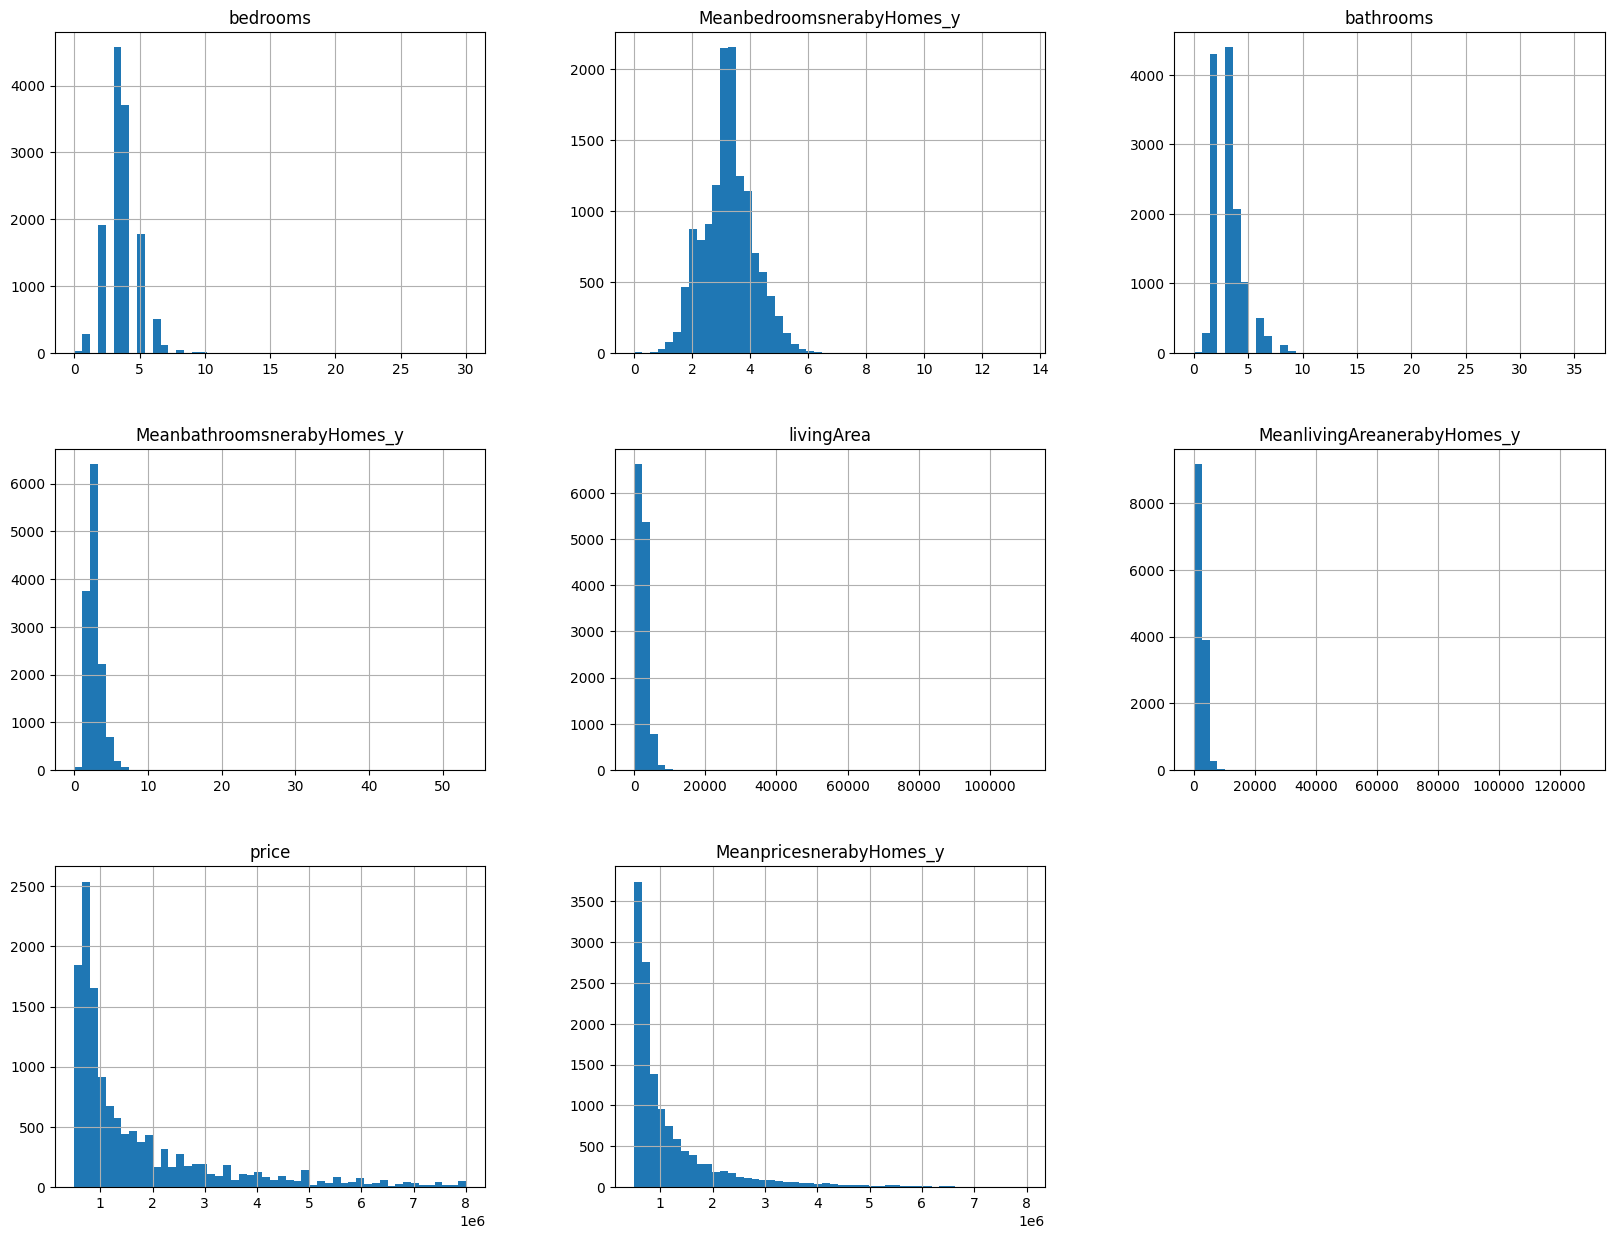

In [ ]:
#se ajusta el rango de los precios promedio de casas cercanas, con un valor minimo de 500,000 y un maximo de 7,999,999

price_house24_sel = price_house24_sel[ (price_house24_sel['MeanpricesnerabyHomes_y'] > 500000 ) & (price_house24_sel['MeanpricesnerabyHomes_y'] < 8000000)  ]

price_house24_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'MeanbedroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'MeanbathroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'MeanlivingAreanerabyHomes_y'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'MeanpricesnerabyHomes_y'}>, <Axes: >]],
      dtype=object)

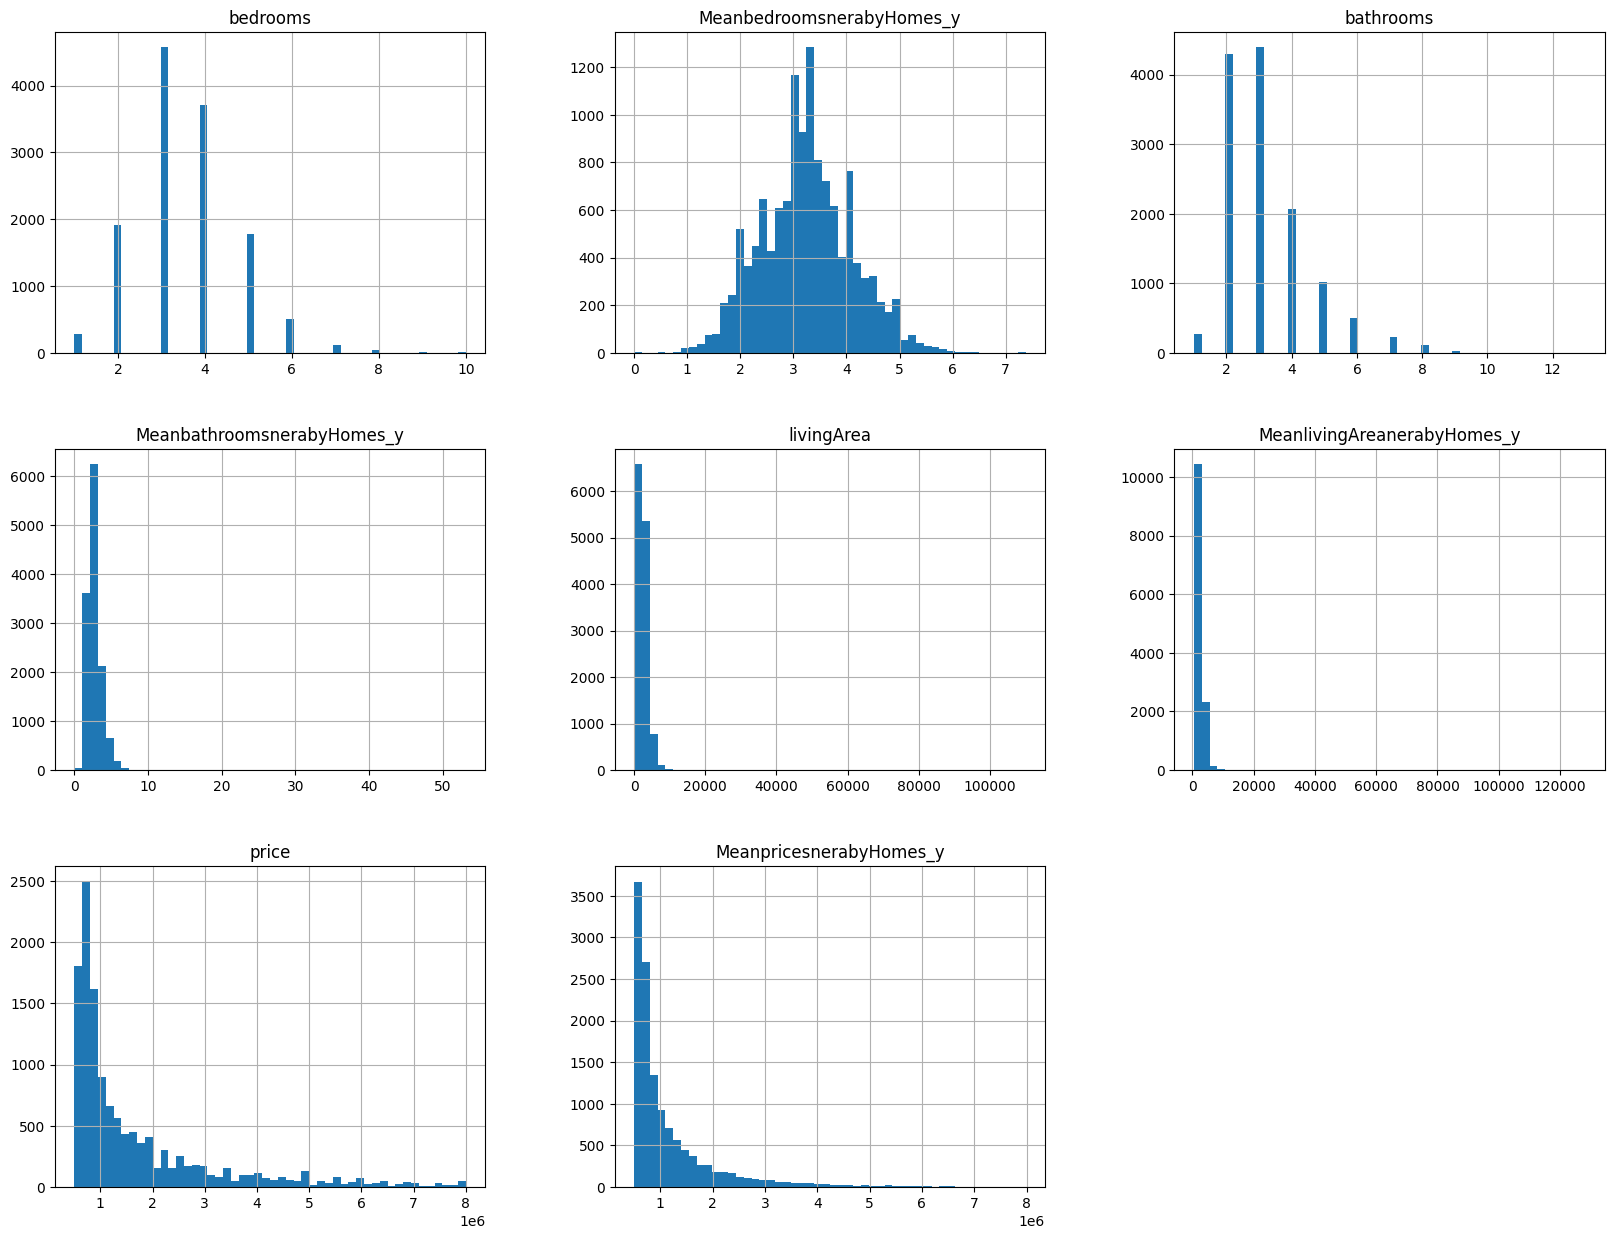

In [ ]:
#se ajusta el rango de los cuartos, con un valor minimo de 1 y un maximo de 10
price_house24_sel = price_house24_sel[ (price_house24_sel['bedrooms'] > 0 ) & (price_house24_sel['bedrooms'] < 11)  ]

price_house24_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'MeanbedroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'MeanbathroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'MeanlivingAreanerabyHomes_y'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'MeanpricesnerabyHomes_y'}>, <Axes: >]],
      dtype=object)

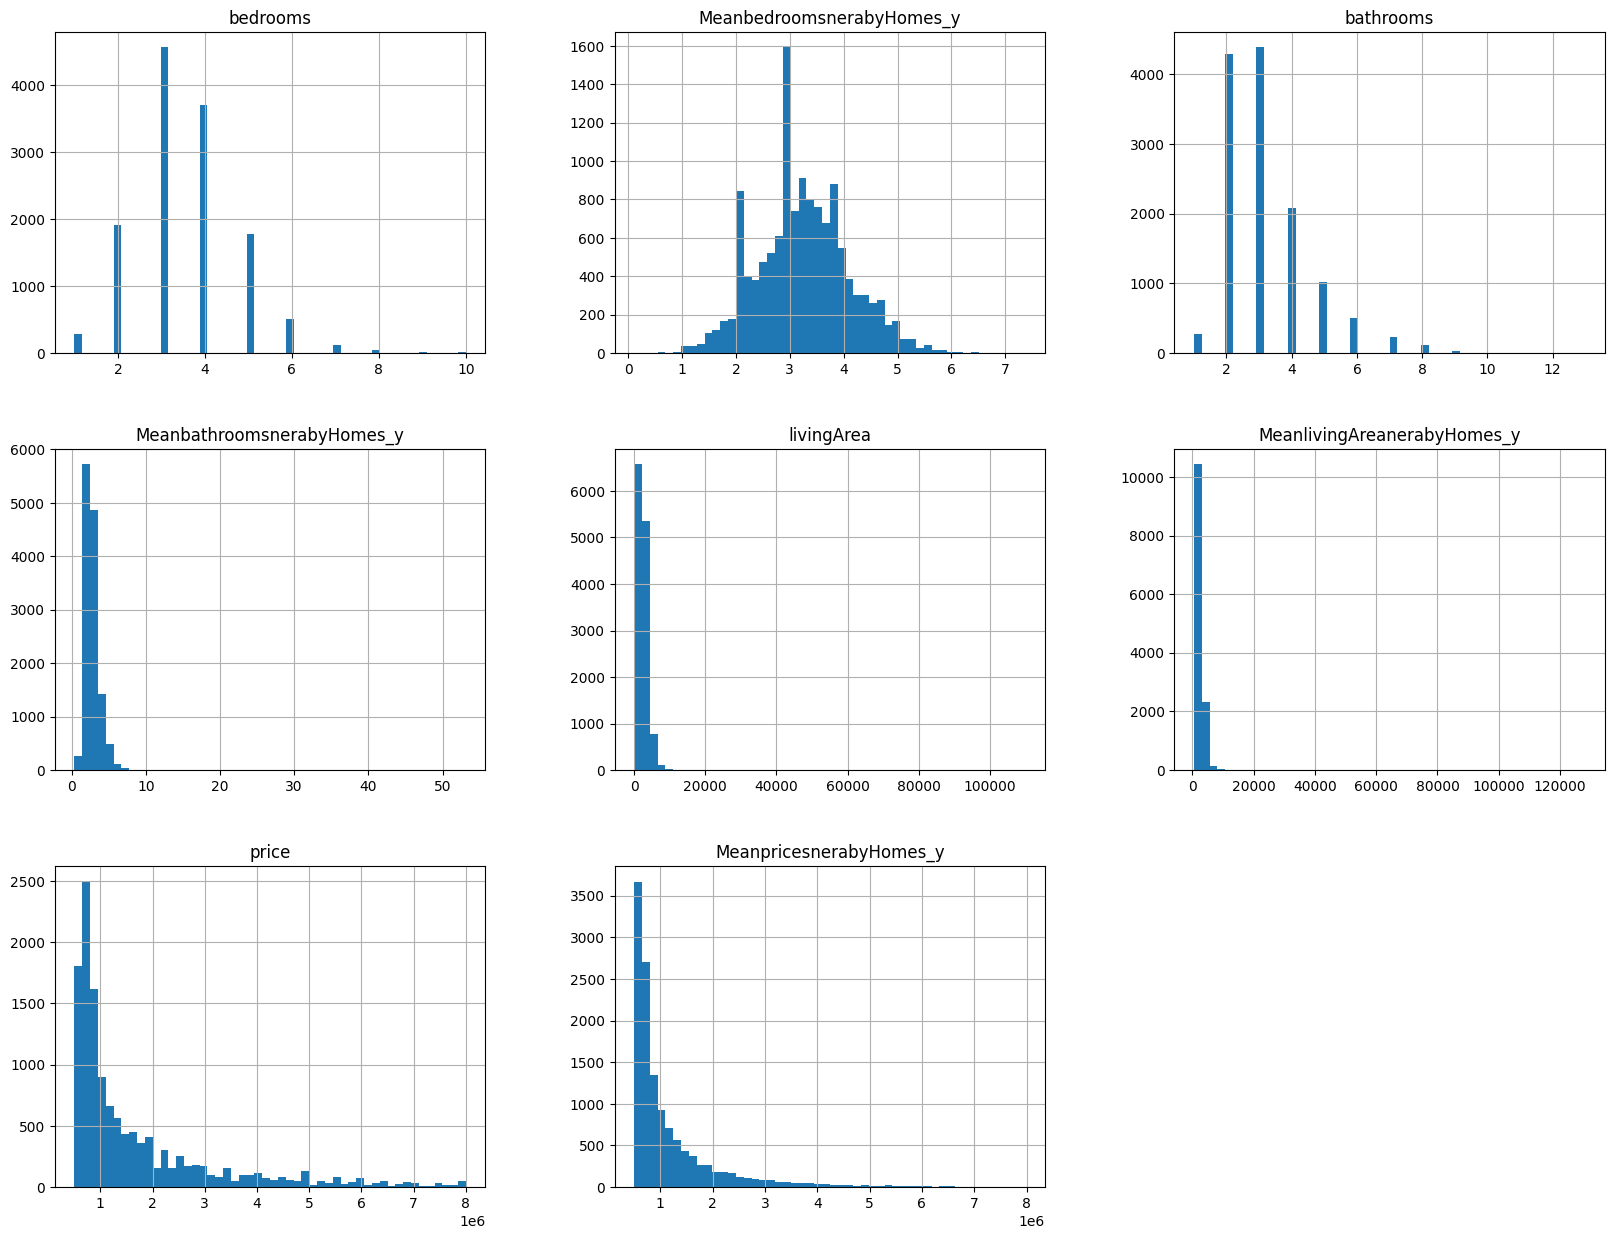

In [ ]:
#se ajusta el rango de los cuartos promedio de casas cercanas, con un valor minimo de 1 y un maximo de 10
price_house24_sel = price_house24_sel[ (price_house24_sel['MeanbedroomsnerabyHomes_y'] > 0 ) & (price_house24_sel['MeanbedroomsnerabyHomes_y'] < 11)  ]

price_house24_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'MeanbedroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'MeanbathroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'MeanlivingAreanerabyHomes_y'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'MeanpricesnerabyHomes_y'}>, <Axes: >]],
      dtype=object)

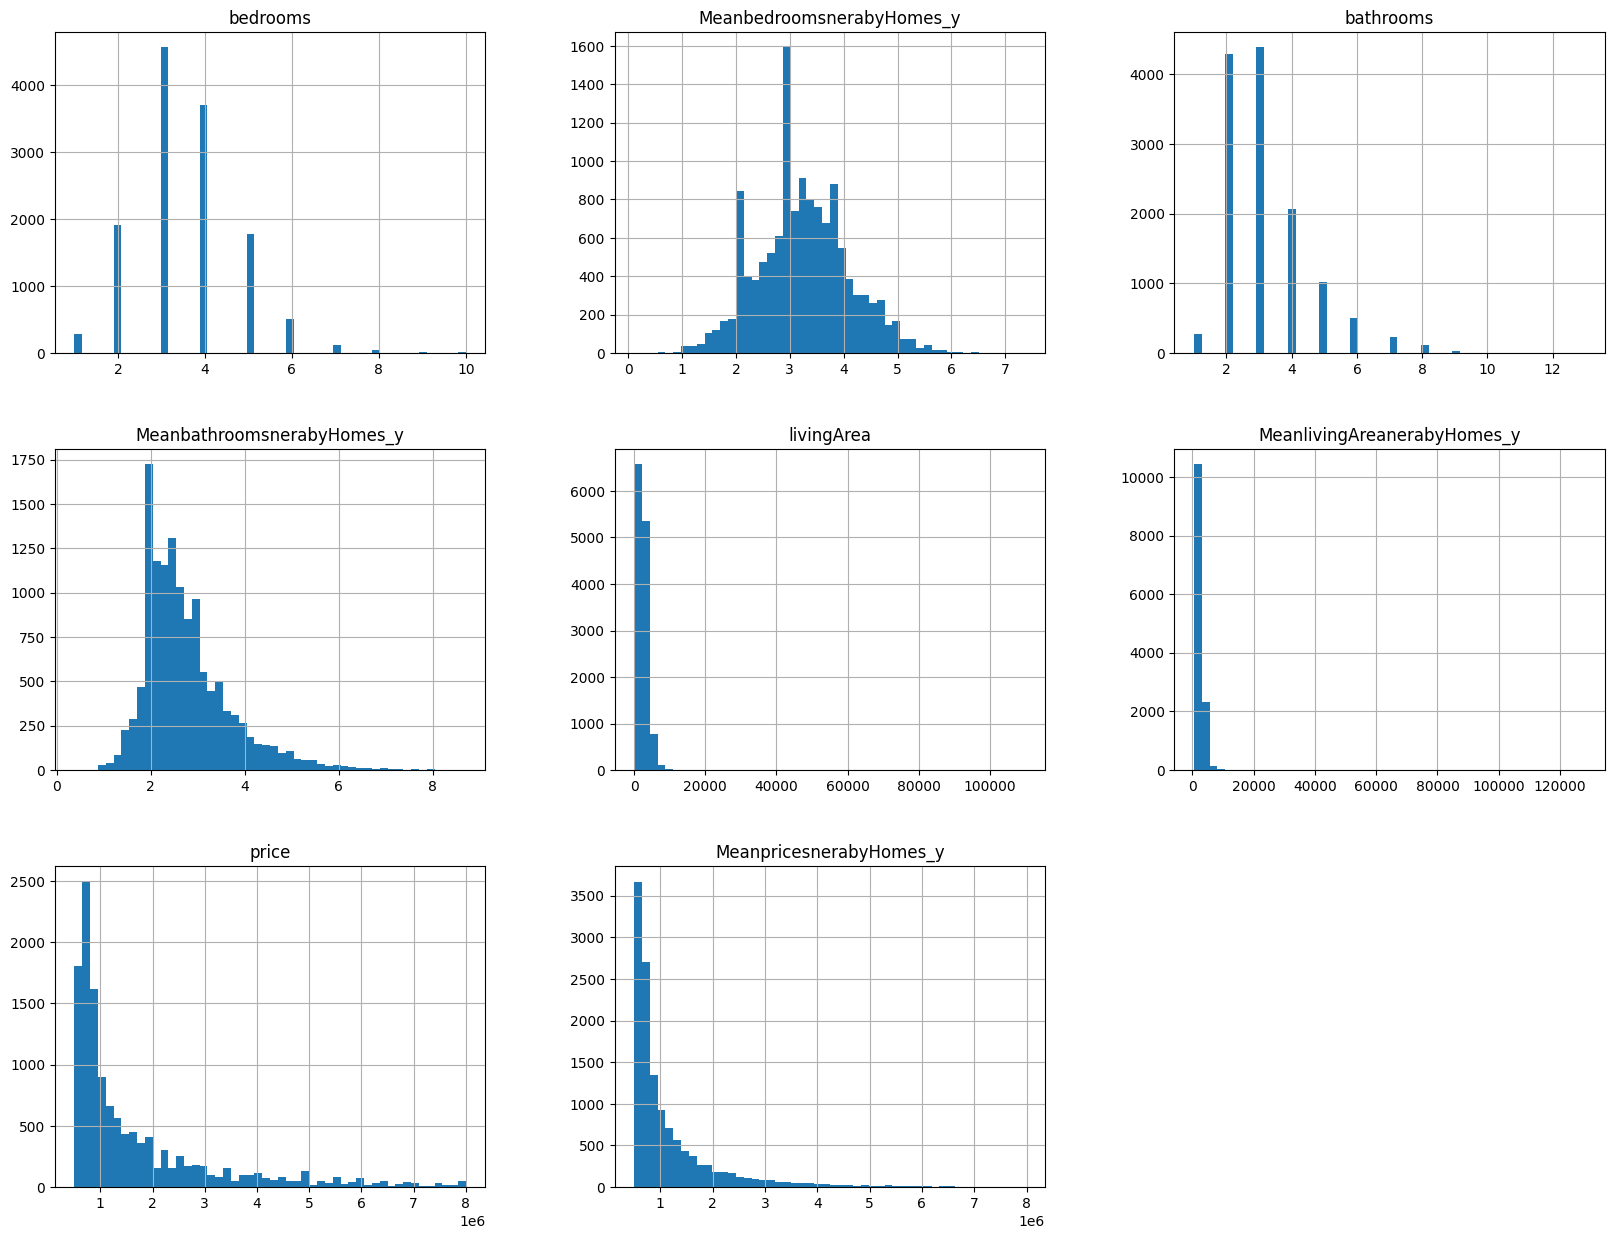

In [ ]:
#se ajusta el rango de los baños promedio de casas cercanas, con un valor minimo de 1 y un maximo de 12
price_house24_sel = price_house24_sel[ (price_house24_sel['MeanbathroomsnerabyHomes_y'] > 0 ) & (price_house24_sel['MeanbathroomsnerabyHomes_y'] < 13)  ]

price_house24_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'MeanbedroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'MeanbathroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'MeanlivingAreanerabyHomes_y'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'MeanpricesnerabyHomes_y'}>, <Axes: >]],
      dtype=object)

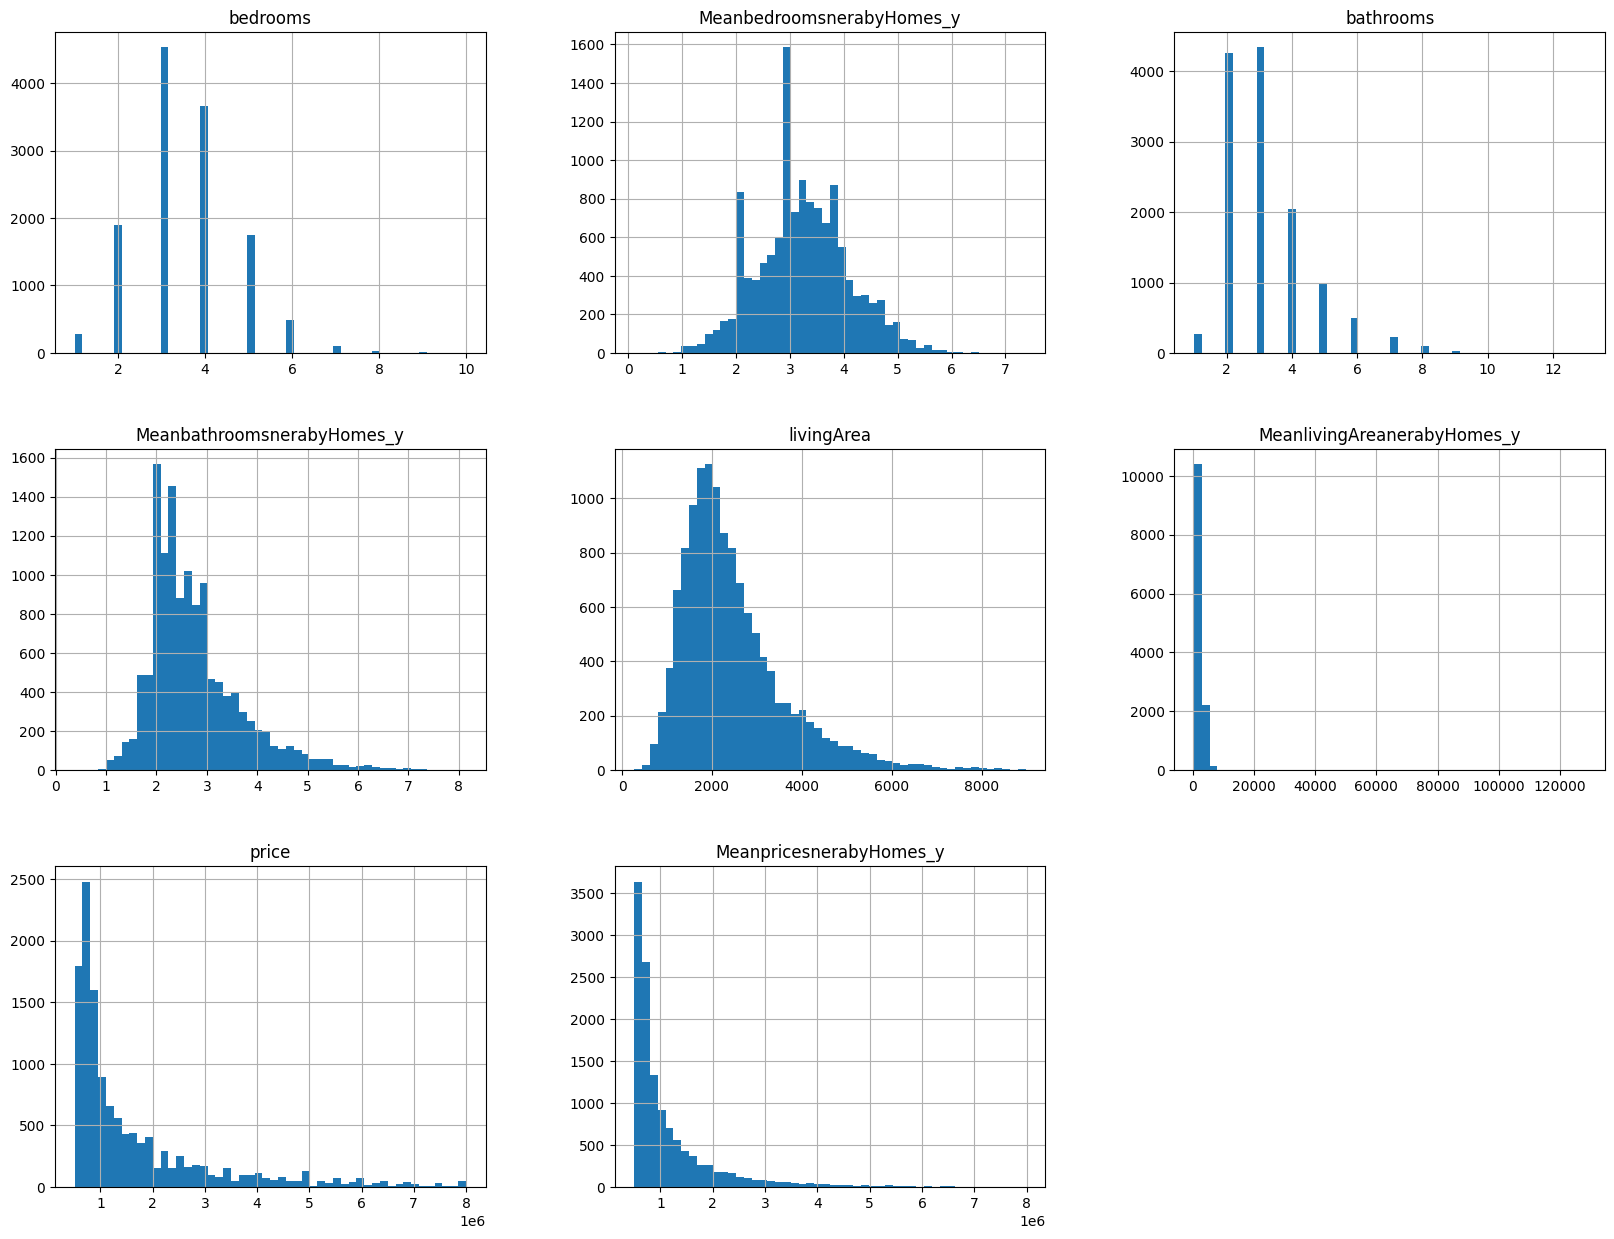

In [ ]:
#se ajusta el rango del area de vivienda, , con un valor minimo de 51 y un maximo de 9,000
price_house24_sel = price_house24_sel[ (price_house24_sel['livingArea'] > 50 ) & (price_house24_sel['livingArea'] < 9001)  ]

price_house24_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'MeanbedroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'MeanbathroomsnerabyHomes_y'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'MeanlivingAreanerabyHomes_y'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'MeanpricesnerabyHomes_y'}>, <Axes: >]],
      dtype=object)

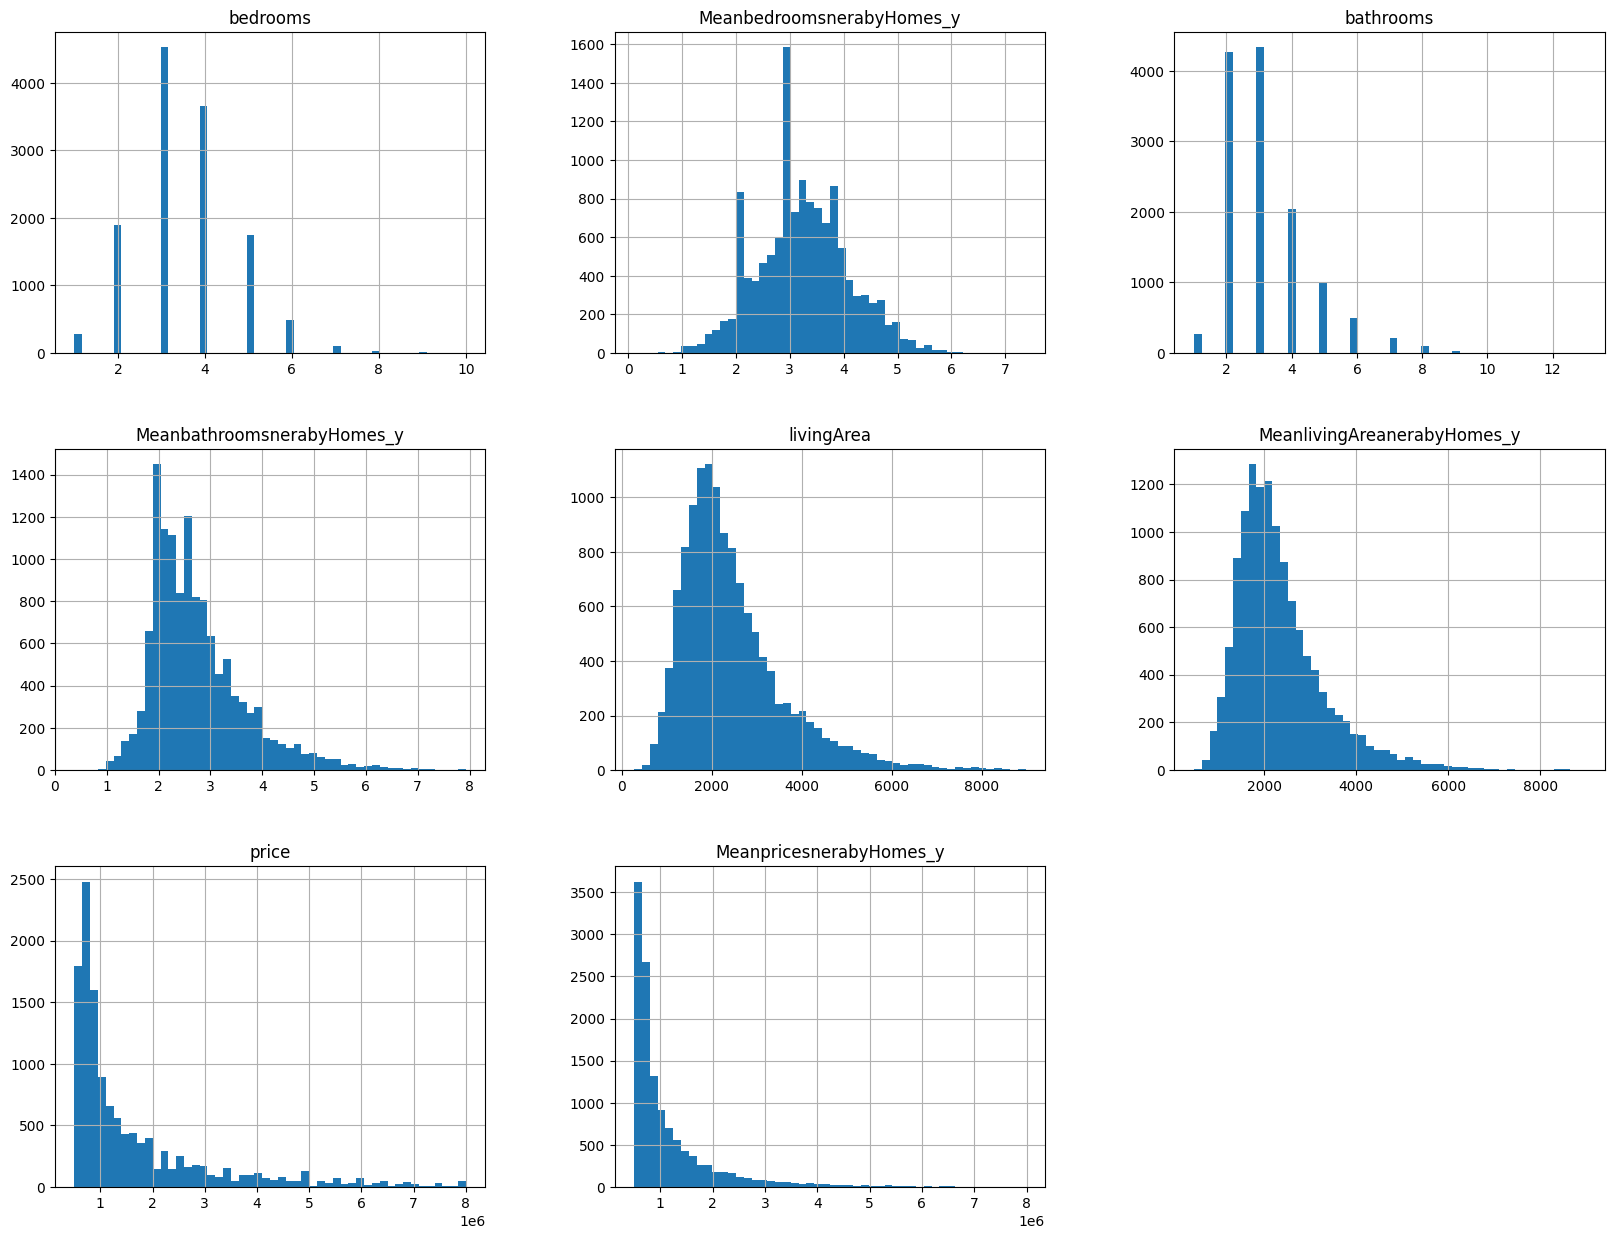

In [ ]:
##se ajusta el rango del promedio de area de vivienda de casas cercanas, con un valor minimo de 51 y un maximo de 9,000
price_house24_sel = price_house24_sel[ (price_house24_sel['MeanlivingAreanerabyHomes_y'] > 50 ) & (price_house24_sel['MeanlivingAreanerabyHomes_y'] < 9001)  ]

price_house24_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y'
]].hist(bins = 50, figsize = (20, 15))


In [ ]:
#se compara el tamaño del dataframe original contra el dataframe con los rangos ajustados
price_house24.shape, price_house24_sel.shape

((28063, 805), (12744, 805))

In [ ]:
# Se crea una variable por la diferencia entre el precio de las viviendas menos el precio promedio de las viviendas cercanas, si la diferencia es negativa significa que hay una oportunidad de compra,
# puesto que el precio de la vivienda esta por debajo del precio promedio.

price_house24_sel['Oportunity']= price_house24_sel['price'] - price_house24_sel['MeanpricesnerabyHomes_y']

In [ ]:
# se crea una variable de clasificacion binaria, la cual señala que cuando el valor de 'Oportunity' es negativo, el valor sera uno, es decir, una oportunidad de compra
# y el valor 0 se presenta cuando la diferencia es positiva, por lo que el precio de la vivienda esta por encima del precio promedio de casas cercanas

price_house24_sel['Oportunidad'] = price_house24_sel['Oportunity'].apply(lambda x: 1 if x < 0 else 0)
price_house24_sel['Oportunidad'].head(10)

,Oportunidad
2,0
4,0
6,0
7,0
11,0
13,0
17,0
18,1
19,0
20,0


In [ ]:
price_house24_sel.describe()

,zpid,bedrooms,bathrooms,price,yearBuilt,zipcode,propertyUpdatePageLink,moveHomeMapLocationLink,propertyEventLogLink,editPropertyHistorylink,isRentalListingOffMarket,building,boroughId,boroughSearchUrl,communityUrl,listPriceLow,livingArea,livingAreaValue,zestimate,zestimateLowPercent,zestimateHighPercent,rentZestimate,restimateLowPercent,restimateHighPercent,homeValues,countyFIPS,pageViewCount,favoriteCount,daysOnZillow,latitude,longitude,listingProvider,isIncomeRestricted,brokerId,ssid,monthlyHoaFee,propertyTaxRate,buildingId,photoCount,lotSize,lotAreaValue,richMedia,cityId,stateId,zipPlusFour,numberOfUnitsTotal,foreclosureDefaultFilingDate,foreclosureLoanDate,foreclosureLoanAmount,foreclosurePriorSaleDate,...,Price change_priceChangeRatePHist_x,Price change_priceHist_y,Price change_pricePerSquareFootPHist_y,Price change_priceChangeRatePHist_y,Pending sale_priceHist_x,Pending sale_pricePerSquareFootPHist_x,Pending sale_priceChangeRatePHist_x,Pending sale_priceHist_y,Pending sale_pricePerSquareFootPHist_y,Pending sale_priceChangeRatePHist_y,Contingent_priceHist_x,Contingent_pricePerSquareFootPHist_x,Contingent_priceChangeRatePHist_x,Contingent_priceHist_y,Contingent_pricePerSquareFootPHist_y,Contingent_priceChangeRatePHist_y,MeanPricesnearbyHomes,MeanBedrmsnearbyHomes,MeanBathrmsnearbyHomes,MeanLivingAreanearbyHomes,MeanlotSizenerabyHomes_x,MeanlotAreaValuenerabyHomes_x,SCHOOLSMeandistance,MeanratingnerabSchool,MeanpricesnerabyHomes_y,MeanbedroomsnerabyHomes_y,MeanbathroomsnerabyHomes_y,MeanlivingAreanerabyHomes_y,MeanlotSizenerabyHomes_y,MeanlotAreaValuenerabyHomes_y,MeantaxPaidtaxHistory,MeanIncrRATETaxHist,MeanVALUETaxHist,MeanVALINCRATETaxHist,latitude_InfoTOD,longitude_InfoTOD,daysOnZillow_InfoTOD,taxAssessedValue_InfoTOD,datePriceChanged_InfoTOD,priceChange_y,price_to_rent_ratio_InfoTOD,contactFormRenderData.data.region_phone_number,adTargets,ADULTCOM,ANNUALDUES,WAITINGPERIOD,BUYINFEE,BUYINFEEFound_In_Columns,Oportunity,Oportunidad
count,"12,744.00","12,744.00","12,744.00","12,744.00","12,739.00","12,744.00",0.00,0.00,0.00,0.00,"12,743.00",0.00,0.00,0.00,0.00,1.00,"12,744.00","12,744.00","8,182.00","8,182.00","8,182.00","8,651.00","6,235.00","6,235.00",0.00,"11,739.00","12,743.00","12,743.00","12,742.00","12,744.00","12,744.00",0.00,0.00,0.00,"12,710.00","6,887.00","12,744.00","2,969.00","12,744.00","11,921.00","11,921.00",0.00,"12,532.00","12,744.00","11,273.00","1,961.00",70.00,1.00,1.00,83.00,...,"9,560.00","9,547.00","9,559.00","9,560.00","4,220.00","4,220.00","4,220.00","4,220.00","4,220.00","4,220.00","2,070.00","2,070.00","2,070.00","2,070.00","2,070.00","2,070.00","12,744.00","12,744.00","12,744.00","12,744.00","12,317.00","12,317.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,317.00","12,317.00","11,600.00","11,602.00","11,602.00","11,602.00","12,744.00","12,744.00","12,744.00","11,604.00","6,014.00","6,014.00","8,032.00",0.00,0.00,"12,744.00","12,744.00","12,744.00","12,744.00",0.00,"12,744.00","12,744.00"
mean,"179,478,478.64",3.54,3.18,"1,689,784.87","1,988.46","33,260.40",NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN,"1,025,000.00","2,455.23","2,455.23","1,499,588.72",5.07,5.12,"7,668.01",8.00,9.41,NaN,"12,069.17",622.02,31.40,112.41,26.10,-80.27,NaN,NaN,NaN,282.48,"1,067.16",0.81,"1,277,354,103.92",41.25,"13,230.71","3,663.27",NaN,"29,690.96",14.00,"4,266.99",110.66,"1,712,950,354,285.71","1,623,974,400,000.00","637,500.00","1,337,081,638,554.22",...,79.98,"1,191,193.64",480.24,79.98,"1,005,774.46",412.69,0.56,"1,005,774.46",412.69,0.56,"1,268,918.29",528.99,0.00,"1,268,918.29",528.99,0.00,"1,183,611.09",3.24,2.74,"2,341.59","306,766.83","4,179.46",2.25,5.71,"1,183,611.09",3.24,2.74,"2,341.59","306,766.83","4,179.46","7,947.73",1.13,"435,114.58",0.95,26.10,-80.27,-1.00,"977,602.80","1,721,120,905,819.75","-55,672.96",207.55,NaN,NaN,0.00,0.00,0.00,0.00,NaN,"506,173.78",0.19
std,"429,879,383.70",1.18,1.34,"1,477,794.18",24.09,190.28,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,"1,157.35","

In [ ]:
# se guarda el Dataframe con los rangos ajustados para facilitar su trabajo en sesiones separadas
price_house24_sel.to_csv('/content/drive/My Drive/price_house24_sel.csv',  encoding = 'utf-8-sig', )

In [ ]:
# se carga el Dataframe
price_house_sel = pd.read_csv('/content/drive/My Drive/price_house24_sel.csv')
price_house_sel.tail(5)

,Unnamed: 0,listingDataSource,zpid,city,state,homeStatus,isListingClaimedByCurrentSignedInUser,isCurrentSignedInAgentResponsible,bedrooms,bathrooms,price,yearBuilt,streetAddress,zipcode,isCurrentSignedInUserVerifiedOwner,regionString,propertyUpdatePageLink,moveHomeMapLocationLink,propertyEventLogLink,editPropertyHistorylink,isRentalListingOffMarket,hdpUrl,nearbyCities,nearbyNeighborhoods,country,nearbyZipcodes,abbreviatedAddress,building,isUndisclosedAddress,boroughId,providerListingID,boroughSearchUrl,communityUrl,isPremierBuilder,isZillowOwned,homeType,currency,listPriceLow,livingArea,livingAreaValue,zestimate,newConstructionType,zestimateLowPercent,zestimateHighPercent,rentZestimate,restimateLowPercent,restimateHighPercent,schools,homeValues,nearbyHomes,...,ratingnerabSchool,levelnerabSchool,gradesnerabSchool,linknearbySchool,SCHOOLSMeandistance,MeanratingnerabSchool,TIMEpaidTaxHist,IDTAXTaxHist,IncrRATETaxHist,VALUETaxHist,VALINCRATETaxHist,MeanpricesnerabyHomes_y,MeanbedroomsnerabyHomes_y,MeanbathroomsnerabyHomes_y,MeanlivingAreanerabyHomes_y,MeanlotSizenerabyHomes_y,MeanlotAreaValuenerabyHomes_y,MeantaxPaidtaxHistory,MeanIncrRATETaxHist,MeanVALUETaxHist,MeanVALINCRATETaxHist,latitude_InfoTOD,longitude_InfoTOD,homeStatus_InfoTOD,daysOnZillow_InfoTOD,isPreforeclosureAuction_InfoTOD,isZillowOwned_InfoTOD,taxAssessedValue_InfoTOD,datePriceChanged_InfoTOD,priceReduction_InfoTOD,priceChange_y,detailUrl_InfoTOD,price_to_rent_ratio_InfoTOD,County,contactFormRenderData.data.region_phone_number,contactFormRenderData.data.subtitle,adTargets,contactFormRenderData.data.footers,image_urls,source_file,ADULTCOM,ADULTCOMFound_In_Columns,ANNUALDUES,ANNUALDUESFound_In_Columns,WAITINGPERIOD,WAITINGPERIODFound_In_Columns,BUYINFEE,BUYINFEEFound_In_Columns,Oportunity,Oportunidad
12739,27885,Phoenix,43727118,naples,FL,for_sale,False,False,4.00,6.00,6295000,"2,025.00",2337 Anthony Ct,"34,109.00",False,Naples FL 34109,NaN,NaN,NaN,NaN,0.00,/homedetails/2337-Anthony-Ct-Naples-FL-34109/4...,"[{'regionUrl': {'path': '/ave-maria-fl/'}, 'na...",[{'regionUrl': {'path': '/golden-gate-naples-f...,USA,"[{'regionUrl': {'path': '/naples-fl-34104/'}, ...",2337 Anthony Ct,NaN,False,NaN,NaN,NaN,NaN,False,False,single_family,USD,NaN,"5,755.00","5,755.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'distance': 2, 'name': 'Pelican Marsh Elemen...",NaN,"[{'zpid': 2062485664, 'miniCardPhotos': [{'url...",...,"[10.0, 7.0, 7.0]","Primary, Middle, High","PK-5, 6-8, 9-12",https://www.greatschools.org/florida/naples/55...,1.47,8.00,"[1694685538339.0, 1663149538339.0, 16316135383...","[1361.69, 1440.52, 1452.62, 1416.68, 1386.51, ...","[-0.05472335, -0.008329759, 0.02536913, 0.0217...","[182847.0, 177521.0, 172350.0, 169970.0, 16614...","[0.030002084, 0.030002901, 0.014002471, 0.0229...","1,206,312.50",3.00,2.00,"1,835.60","51,618.33","1,453.15","1,490.33",0.07,"144,092.17",0.06,26.23,-81.77,FOR_SALE,-1,False,False,"854,062.00","1,720,767,600,000.00",NaN,"400,000.00",https://www.zillow.com/homedetails/2337-Anthon...,NaN,Monroe,NaN,NaN,NaN,NaN,"[""https://www.greatschools.org/florida/naples/...",MONROE_detailsVENTA120924_TODO_processed.xlsx,0,NaN,0,NaN,0,NaN,0,NaN,"5,088,687.50",0
12740,27887,Phoenix,247774456,naples,FL,for_sale,False,False,4.00,5.00,6900000,"2,024.00",61 14th St S,"34,102.00",False,Naples FL 34102,NaN,NaN,NaN,NaN,0.00,/homedetails/61-14th-St-S-Naples-FL-34102/2477...,"[{'regionUrl': {'path': '/ave-maria-fl/'}, 'na...",[{'regionUrl': {'path': '/golden-gate-naples-f...,USA,"[{'regionUrl': {'path': '/naples-fl-34104/'}, ...",61 14th St S,NaN,False,NaN,NaN,NaN,NaN,False,False,single_family,USD,NaN,"4,056.00","4,056.00",NaN,BUILDER_SPEC,NaN,NaN,NaN,NaN,NaN,"[{'distance': 1.6, 'name': 'Shadowlawn Element...",NaN,"[{'zpid': 333384154, 'miniCardPhotos': [{'url'...",...,"[8.0, 6.0, 5.0]","Primary, Middle, Primary","PK-5, 6-8, PK,9-12",https://www.greatschools.org/florida/naples/52...,1.33,6.33,"[1694685554595.0, 1663149554595.0, 16316135545...","[10574.8, 10181.85, 13141.99, 7

# Seleccion de Datos

In [ ]:
# se seleccionan solo las columnas relevantes para estimar el modelo: cuartos, baños, area de vivienda, precios de la vivienda y de casas cercanas, y las variables que se crearon, Oportunity y Oportunidad
price_house_sel = price_house_sel[['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y', 'price','MeanpricesnerabyHomes_y',
                                   'Oportunity', 'Oportunidad']]
price_house_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bedrooms                     12744 non-null  float64
 1   MeanbedroomsnerabyHomes_y    12744 non-null  float64
 2   bathrooms                    12744 non-null  float64
 3   MeanbathroomsnerabyHomes_y   12744 non-null  float64
 4   livingArea                   12744 non-null  float64
 5   MeanlivingAreanerabyHomes_y  12744 non-null  float64
 6   price                        12744 non-null  int64  
 7   MeanpricesnerabyHomes_y      12744 non-null  float64
 8   Oportunity                   12744 non-null  float64
 9   Oportunidad                  12744 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 995.8 KB


In [ ]:
#
price_house_sel.describe()

,bedrooms,MeanbedroomsnerabyHomes_y,bathrooms,MeanbathroomsnerabyHomes_y,livingArea,MeanlivingAreanerabyHomes_y,price,MeanpricesnerabyHomes_y,Oportunity,Oportunidad
count,"12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00"
mean,3.54,3.24,3.18,2.74,"2,455.23","2,341.59","1,689,784.87","1,183,611.09","506,173.78",0.19
std,1.18,0.85,1.34,0.91,"1,157.35",963.63,"1,477,794.18","958,197.15","997,839.81",0.39
min,1.00,0.11,1.00,0.38,271.00,475.25,"504,500.00","500,025.00","-6,518,325.00",0.00
25%,3.00,2.71,2.00,2.12,"1,670.00","1,688.62","740,000.00","628,562.50","34,121.28",0.00
50%,3.00,3.25,3.00,2.50,"2,172.00","2,126.50","1,000,000.00","806,320.12","176,746.53",0.00
75%,4.00,3.75,4.00,3.12,"2,947.00","2,757.44","1,999,000.00","1,327,279.17","624,899.34",0.00
max,10.00,7.38,13.00,7.93,"8,980.00","8,980.71","7,999,999.00","7,981,200.00","7,161,555.56",1.00


In [ ]:
# se cuenta el numero de casos de oportunidad de compra
price_house_sel['Oportunidad'].value_counts()

,count
Oportunidad,
0,10339
1,2405


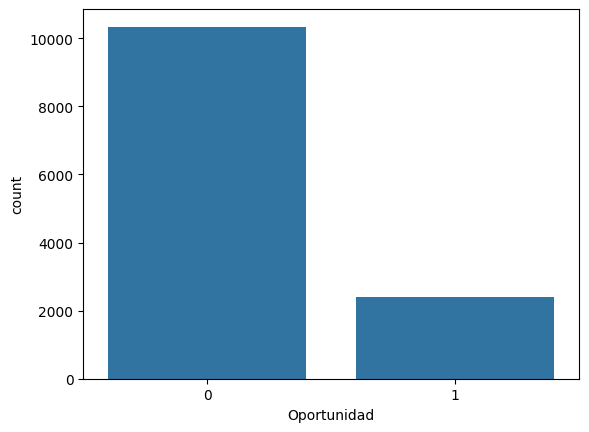

In [ ]:
# se hace un grafico de la distribucion de la variable Oportunidad, donde se observa que son mas los casos donde el precio de la vivienda esta por encima del precio promedio de casas cercanas, por lo que son
# escasas las areas de oportunidad de compra de casas en un precio menor al de viviendas cercanas a la ubicación de la vivienda en venta.
sn.countplot( x = 'Oportunidad', data = price_house_sel )

plt.show()

In [ ]:
price_house_sel.Oportunidad.describe()

,Oportunidad
count,"12,744.00"
mean,0.19
std,0.39
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


# **Modelado**

*Se usan los datos de mediados de septiembre de 2024 para entrenar un modelo que permita clasificar "Oportunidad de Compra de Casas"*

*Se plantea un modelo de respuesta binaria*

##Logistic Regression

*Logistic Regresión, o Regresión Logistica, es un tipo de análisis de regresión en estadistica que se usa para predecir la categoría de una variable dependiente definida por un conjunto de variables independientes. En la Regresión Logistica la variable dependiente es siempre binaria. Esta regresión es principalmente utilizada para predecir y calcular la probabilidad de éxito.*




In [ ]:
# se crea una variable constante
price_house_sel['constante'] = 1

In [ ]:
# Selecciones las columnas de nuestra regresión:
price_house_sel.columns

Index(['bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms',
       'MeanbathroomsnerabyHomes_y', 'livingArea',
       'MeanlivingAreanerabyHomes_y', 'price', 'MeanpricesnerabyHomes_y',
       'Oportunity', 'Oportunidad', 'constante'],
      dtype='object')

In [ ]:
# Model

model = sm.Logit(
    price_house_sel.Oportunidad, # Y
    price_house_sel[[ 'constante', 'bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms',
       'MeanbathroomsnerabyHomes_y', 'livingArea',
       'MeanlivingAreanerabyHomes_y']]
)

result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.375072
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Oportunidad   No. Observations:                12744
Model:                          Logit   Df Residuals:                    12737
Method:                           MLE   Df Model:                            6
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.2256
Time:                        23:18:52   Log-Likelihood:                -4779.9
converged:                       True   LL-Null:                       -6172.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
constante                      -0.4742      0.112     -4.221      0.000      -0.694      -0.254
bedrooms                       -0.6163      0.051    -12.050      0.000      -0.717      -0.516
MeanbedroomsnerabyHomes_y       0.2120      0.059      3.590      0.000       0.096       0.328
bathrooms                      -0.4290      0.050     -8.601      0.000      -0.527      -0.331
MeanbathroomsnerabyHomes_y      0.7320      0.060     12.164      0.000       0.614       0.850
livingArea                     -0.0014   7.61e-05    -18.688      0.000      -0.002      -0.001
MeanlivingAreanerabyHomes_y     0.0011   6.46e-05     17.390      0.000       0.001       0.001
===============================================================================================
"""

In [ ]:
#
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Oportunidad   No. Observations:                12744
Model:                          Logit   Df Residuals:                    12737
Method:                           MLE   Df Model:                            6
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.2256
Time:                        23:18:56   Log-Likelihood:                -4779.9
converged:                       True   LL-Null:                       -6172.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
constante                      -0.4742      0.112     -4.221      0.000      -0.694      -0.254
bedrooms                       -0.6163      0.051    -12.050      0.000      -0.

In [ ]:
#se dividen los datos en train y test, utilizando el 30% de la porcion de los casos de Oportunidad igual a 0 para el test y el resto para el train, debido a su gran volumen con respecto a los datos de
# Oportunidad igual a 1
price_house_sel_train, price_house_sel_test = train_test_split( price_house_sel[ price_house_sel['Oportunidad'] == 0 ],
                                                  test_size = 0.3, random_state = 58 )

price_house_sel_train = pd.concat( [ price_house_sel[ price_house_sel['Oportunidad'] == 1 ], price_house_sel_train ], ignore_index = True )

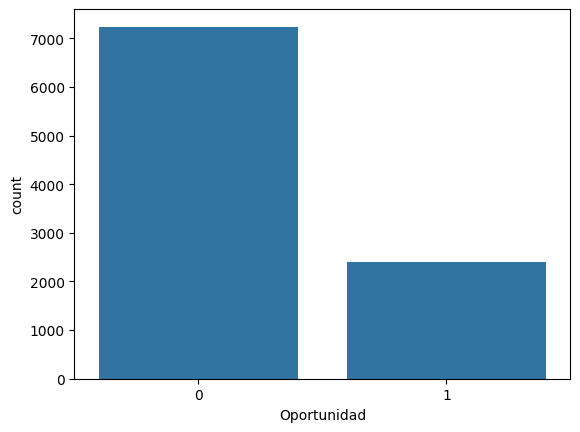

In [ ]:
#
sn.countplot( x = 'Oportunidad', data = price_house_sel_train)

plt.show()

In [ ]:
price_house_sel_train.Oportunidad.describe()

,Oportunidad
count,"9,642.00"
mean,0.25
std,0.43
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


In [ ]:
price_house_sel_train.describe()

,bedrooms,MeanbedroomsnerabyHomes_y,bathrooms,MeanbathroomsnerabyHomes_y,livingArea,MeanlivingAreanerabyHomes_y,price,MeanpricesnerabyHomes_y,Oportunity,Oportunidad,constante
count,"9,642.00","9,642.00","9,642.00","9,642.00","9,642.00","9,642.00","9,642.00","9,642.00","9,642.00","9,642.00","9,642.00"
mean,3.49,3.24,3.14,2.75,"2,422.47","2,350.33","1,655,685.28","1,209,152.12","446,533.17",0.25,1.00
std,1.18,0.85,1.33,0.92,"1,150.31",970.57,"1,457,936.87","999,783.34","996,392.13",0.43,0.00
min,1.00,0.11,1.00,0.67,271.00,475.25,"504,500.00","500,025.00","-6,518,325.00",0.00,1.00
25%,3.00,2.67,2.00,2.12,"1,633.00","1,689.31","728,000.00","633,128.12",992.53,0.00,1.00
50%,3.00,3.20,3.00,2.56,"2,144.00","2,138.88","995,000.00","815,930.69","149,225.81",0.00,1.00
75%,4.00,3.75,4.00,3.14,"2,917.75","2,766.31","1,987,875.00","1,354,400.00","539,643.75",0.00,1.00
max,10.00,7.38,13.00,7.93,"8,980.00","8,969.62","7,999,999.00","7,981,200.00","7,161,555.56",1.00,1.00


In [ ]:
price_house_sel.describe()

,bedrooms,MeanbedroomsnerabyHomes_y,bathrooms,MeanbathroomsnerabyHomes_y,livingArea,MeanlivingAreanerabyHomes_y,price,MeanpricesnerabyHomes_y,Oportunity,Oportunidad,constante
count,"12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00","12,744.00"
mean,3.54,3.24,3.18,2.74,"2,455.23","2,341.59","1,689,784.87","1,183,611.09","506,173.78",0.19,1.00
std,1.18,0.85,1.34,0.91,"1,157.35",963.63,"1,477,794.18","958,197.15","997,839.81",0.39,0.00
min,1.00,0.11,1.00,0.38,271.00,475.25,"504,500.00","500,025.00","-6,518,325.00",0.00,1.00
25%,3.00,2.71,2.00,2.12,"1,670.00","1,688.62","740,000.00","628,562.50","34,121.28",0.00,1.00
50%,3.00,3.25,3.00,2.50,"2,172.00","2,126.50","1,000,000.00","806,320.12","176,746.53",0.00,1.00
75%,4.00,3.75,4.00,3.12,"2,947.00","2,757.44","1,999,000.00","1,327,279.17","624,899.34",0.00,1.00
max,10.00,7.38,13.00,7.93,"8,980.00","8,980.71","7,999,999.00","7,981,200.00","7,161,555.56",1.00,1.00


In [ ]:
# se hace un nuevo modelo ajustado con la proporcion de los datos
model_adj = sm.Logit(
    price_house_sel_train.Oportunidad, # Y
    price_house_sel_train[[ 'constante', 'bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms',
       'MeanbathroomsnerabyHomes_y', 'livingArea',
       'MeanlivingAreanerabyHomes_y']]
)

result_adj = model_adj.fit()
print(result_adj.summary())

Optimization terminated successfully.
         Current function value: 0.429321
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Oportunidad   No. Observations:                 9642
Model:                          Logit   Df Residuals:                     9635
Method:                           MLE   Df Model:                            6
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.2357
Time:                        23:20:13   Log-Likelihood:                -4139.5
converged:                       True   LL-Null:                       -5416.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
constante                      -0.2175      0.120     -1.815      0.069   

## Implementación del modelo

In [ ]:
#
x = price_house_sel_train[[ 'constante', 'bedrooms', 'MeanbedroomsnerabyHomes_y', 'bathrooms', 'MeanbathroomsnerabyHomes_y', 'livingArea', 'MeanlivingAreanerabyHomes_y']]
y = price_house_sel_train.Oportunidad

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.20, random_state = 58)

In [ ]:
# De sklearn

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
y_train.value_counts()

,count
Oportunidad,
0,5817
1,1896


In [ ]:
# Model accuracy

accuracy_score( y_test, y_pred )

0.7905650596163816

In [ ]:
# Confusion matrix

cm = confusion_matrix( y_test, y_pred )

conf_matrix = pd.DataFrame( data = cm,
                            columns = ['Predicted:0','Predicted:1'],
                            index = ['Actual:0','Actual:1'] )

conf_matrix

,Predicted:0,Predicted:1
Actual:0,1353,67
Actual:1,337,172


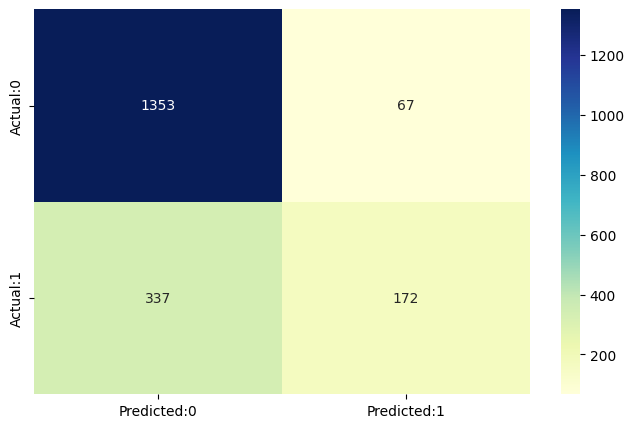

In [ ]:
# codigo 76

plt.figure( figsize = (8,5) )

sn.heatmap( conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu" )

plt.show()

In [ ]:
# Model Evaluation - Statistics

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
precision= TP/float(TP+FP)
f1_score= 2*(precision*sensitivity)/(precision+sensitivity)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity,'\n',

'F1-Score = 2*(Precision*Recall)/(Precision+Recall)= ', f1_score )

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7905650596163816 
 The Missclassification = 1-Accuracy =  0.20943494038361843 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.3379174852652259 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9528169014084507 
 Positive Predictive value = TP/(TP+FP) =  0.7196652719665272 
 Negative predictive Value = TN/(TN+FN) =  0.8005917159763314 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.1618332698003035 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.6948685668317659 
 F1-Score = 2*(Precision*Recall)/(Precision+Recall)=  0.4598930481283422


El modelo posee una precision aceptable del 79.05%, su precision para valores positivos es del 71.96% que sigue siendo aceptable. Sin embargo, para el valor de su sensibilidad que es de 33.79%, el modelo muestra que no es preciso, ya que tiene mas falsos negativos que verdaderos positivos lo cual significa que no predice los valores positivos de forma eficaz. Por ultimo, el F1 score es del 45.98% lo cual es el reflejo de un modelo que es tiene una precision aceptable pero que termina siendo castigado por su baja sensibilidad.


In [ ]:
# Calculamos las probabiliades:

y_pred_prob    = logreg.predict_proba( X_test )[: , :]

y_pred_prob_df = pd.DataFrame( data = y_pred_prob,
                               columns = ['No oportunidad de compra (0)','Oportunidad de compra (1)'] )

y_pred_prob_df.head()

,No oportunidad de compra (0),Oportunidad de compra (1)
0,0.77,0.23
1,0.89,0.11
2,0.85,0.15
3,0.99,0.01
4,0.57,0.43


In [ ]:
y_pred_prob_df.describe()

,No oportunidad de compra (0),Oportunidad de compra (1)
count,"1,929.00","1,929.00"
mean,0.76,0.24
std,0.21,0.21
min,0.00,0.00
25%,0.64,0.07
50%,0.80,0.20
75%,0.93,0.36
max,1.00,1.00


El valor de la media de la prediccion muestra un valor similar al del price_house_sel_train (24% de los datos son casos de Oportunidad igual a 1, Oportunidad de Compra)

# ROC curve

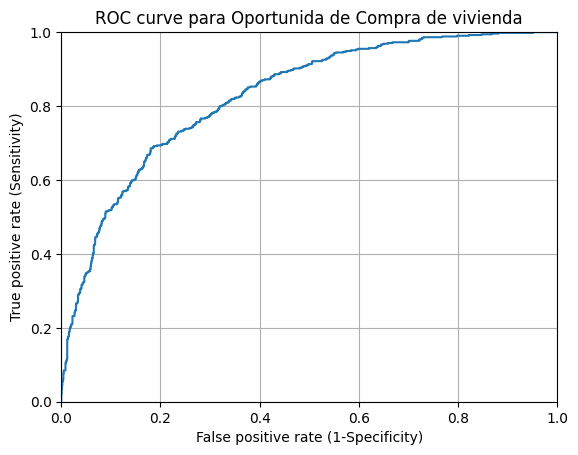

In [ ]:
#

fpr, tpr, thresholds = roc_curve( y_test, y_pred_prob_df.iloc[:,1] )

#
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve para Oportunida de Compra de vivienda')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
#

roc_auc_score(y_test, y_pred_prob_df.iloc[:,1])

0.8268767813165833

Este resultado indica un buen rendimiento del modelo en la discriminacion de clases